In [100]:
p1=[-1,0,2]
p2= [0,2,0]
p3=[0,0,0]
p4=[-sqrt(3),0,0]

3-element Vector{Float64}:
 -1.7320508075688772
  0.0
  0.0

In [101]:
A = [
    p1'
    p2'
    p3'
    p4'
]

4×3 Matrix{Float64}:
 -1.0      0.0  2.0
  0.0      2.0  0.0
  0.0      0.0  0.0
 -1.73205  0.0  0.0

In [102]:
C = A'A

3×3 Matrix{Float64}:
  4.0  0.0  -2.0
  0.0  4.0   0.0
 -2.0  0.0   4.0

Agora precisamos calcular autovalores e autovetores

In [103]:
using LinearAlgebra

eigen(C)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 2.000000000000001
 4.0
 6.0
vectors:
3×3 Matrix{Float64}:
 0.707107  0.0  -0.707107
 0.0       1.0   0.0
 0.707107  0.0   0.707107

In [104]:
using LinearAlgebra

λ=[6, 4, 2]
ν = eigvecs(C)

3×3 Matrix{Float64}:
 0.707107  0.0  -0.707107
 0.0       1.0   0.0
 0.707107  0.0   0.707107

In [105]:
ν1 = ν[:,1]
ν2 = ν[:,2]
ν3 = ν[:, 3]

#νn' * νn sempre dá zero

3-element Vector{Float64}:
 -0.7071067811865475
  0.0
  0.7071067811865477

In [106]:
pca2 = [
p1'ν3
p2'ν3
p3'ν3
p4'ν3]

pca1 = [
p1'ν2
p2'ν2
p3'ν2
p4'ν2]

print(pca2)
print("\n")
print(pca1)



[2.121320343559643, 0.0, 0.0, 1.224744871391589]
[0.0, 2.0, 0.0, 0.0]

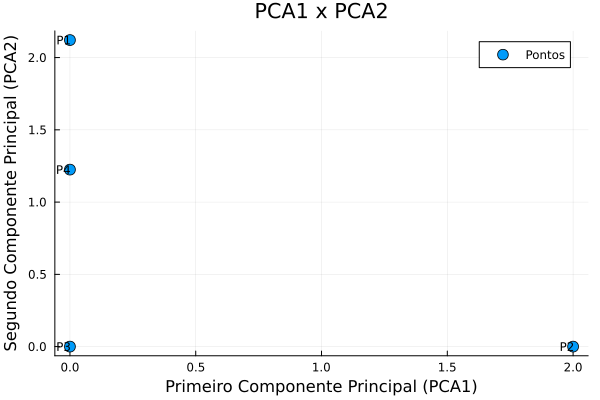

In [107]:
using Plots
gr() # Definindo GR como backend

# Criar o gráfico de dispersão
scatter(pca1, pca2, 
    xlabel="Primeiro Componente Principal (PCA1)",
    ylabel="Segundo Componente Principal (PCA2)",
    title="PCA1 x PCA2",
    label="Pontos",
    marker=:circle,
    markersize=6,
    grid=true
)

# Adicionar anotações para cada ponto
for i in 1:length(pca1)
    annotate!(pca1[i], pca2[i], text("P$i", :black, :right, 8))
end

display(current())  # Força a exibição do gráfico

# Fatoração Matricial

In [108]:
A = [ p1 p2 p3 p4 ]

3×4 Matrix{Float64}:
 -1.0  0.0  0.0  -1.73205
  0.0  2.0  0.0   0.0
  2.0  0.0  0.0   0.0

In [109]:
F1 = [ ν3 ν2 ]

3×2 Matrix{Float64}:
 -0.707107  0.0
  0.0       1.0
  0.707107  0.0

In [115]:
F2 = [ pca2 pca1 ]'

2×4 adjoint(::Matrix{Float64}) with eltype Float64:
 2.12132  0.0  0.0  1.22474
 0.0      2.0  0.0  0.0

In [116]:
M2 = F1*F2

3×4 Matrix{Float64}:
 -1.5  0.0  0.0  -0.866025
  0.0  2.0  0.0   0.0
  1.5  0.0  0.0   0.866025

M é a melhor matriz de posto = 2 que aproxima a matriz P na Norma de Frobenius

Dizemos também que M ≈ P

In [122]:
M1 = ν3 * pca2'

3×4 Matrix{Float64}:
 -1.5  -0.0  -0.0  -0.866025
  0.0   0.0   0.0   0.0
  1.5   0.0   0.0   0.866025

O somatório dos autovalores é 12, como utilizando o pca e autovetor de 6 obtemos M1, dizemos que essa matriz comporta 50% dos dados(6/12), ou seja, como na M2 utilizamos os autovalores 4 e 6, dizemos que essa matriz comporta 83% dos dados, o mesmo serviria caso utilizassemos o autovalor 3 para obter M3

4-element Vector{Float64}:
 2.121320343559643
 0.0
 0.0
 1.224744871391589